<a href="https://colab.research.google.com/github/AunAli6783/python-/blob/main/pytorch" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
import torch
import matplotlib.pyplot as plt


In [ ]:
x,y =make_blobs(n_samples=1000,n_features=2, centers=4 , random_state=42, cluster_std=3.5)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x.shape , y.shape

((1000, 2), (1000,))

In [ ]:
x.ndim , y.ndim

(2, 1)

In [ ]:
x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.long)
x.dtype , y.dtype

(torch.float32, torch.int64)

In [ ]:
x_train, x_test , y_train  , y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

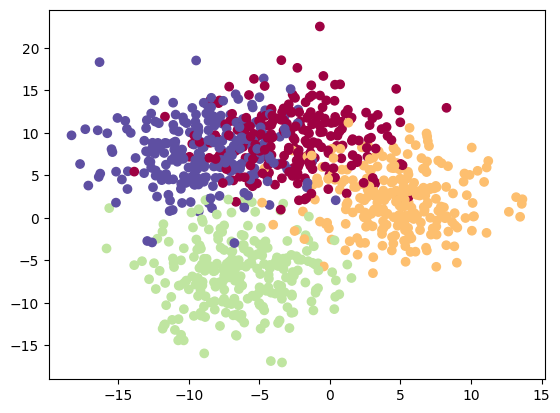

In [ ]:
plt.plot(figsize=(20,7))
plt.scatter(x[:,0],x[:,1], cmap=plt.cm.Spectral,c=y.ravel())
plt.show()

In [ ]:
device ='cuda' if torch.cuda.is_available else 'cpu'
device

'cuda'

In [ ]:
from torch import nn

In [ ]:
class blobclass(nn.Module):
  def __init__(self, input,hidden,output):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input, out_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden, out_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden, out_features=output))
  def forward(self,x):
    return self.linear_layer_stack(x)

model_0=blobclass(2,10,4)
model_0


blobclass(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [ ]:
model_0

blobclass(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [ ]:
model_0.parameters()

<generator object Module.parameters at 0x7bf576102dc0>

In [ ]:
model_0.state_dict()


OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('linear_layer_stack.0.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('linear_layer_stack.2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -

In [ ]:
loss = nn.CrossEntropyLoss()
optimizer =torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [ ]:
model_0(x_train)[0].shape

torch.Size([4])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_pred=model_0(x_train)
y_pred[:10]
y_pred.shape

torch.Size([800, 4])

In [ ]:
y_pred2=torch.softmax(y_pred,dim=1)
y_pred2[:10]

tensor([[0.2087, 0.2420, 0.4428, 0.1066],
        [0.1776, 0.3650, 0.3126, 0.1448],
        [0.2541, 0.2845, 0.2620, 0.1994],
        [0.2379, 0.2716, 0.2903, 0.2001],
        [0.2233, 0.2731, 0.2832, 0.2203],
        [0.2076, 0.2483, 0.4354, 0.1086],
        [0.1747, 0.3487, 0.3184, 0.1582],
        [0.2330, 0.2612, 0.3494, 0.1565],
        [0.2251, 0.2719, 0.2816, 0.2214],
        [0.2001, 0.3095, 0.3014, 0.1890]])

In [ ]:
sum(y_pred2[0])

tensor(1.0000)

In [ ]:
y_lab=torch.argmax(y_pred2,dim=1)
y_lab

tensor([2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
        2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1,
        2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,
        1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2,
        1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
        1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
        1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
        1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1,
        2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
        2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
        1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
        1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
        1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,

In [ ]:
torch.manual_seed(42)

epoches=100

for epoch in range(epoches):
  model_0.train()
  x_train = x_train[:y_train.shape[0]]
  y_logit=model_0(x_train)
  y_pred=torch.softmax(y_logit,dim=1).argmax(dim=1)
  train_loss = loss(y_logit, y_train)



  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logit=model_0(x_test)
    test_pred=torch.softmax(test_logit,dim=1).argmax(dim=1)
    test_loss=loss(test_logit,y_test)

  if epoch%10==0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.3f} | Test Loss: {test_loss:.3f}")



Epoch: 0 | Train Loss: 1.135 | Test Loss: 1.170
Epoch: 10 | Train Loss: 1.101 | Test Loss: 1.138
Epoch: 20 | Train Loss: 1.065 | Test Loss: 1.103
Epoch: 30 | Train Loss: 1.027 | Test Loss: 1.064
Epoch: 40 | Train Loss: 0.988 | Test Loss: 1.023
Epoch: 50 | Train Loss: 0.948 | Test Loss: 0.978
Epoch: 60 | Train Loss: 0.908 | Test Loss: 0.933
Epoch: 70 | Train Loss: 0.871 | Test Loss: 0.890
Epoch: 80 | Train Loss: 0.837 | Test Loss: 0.851
Epoch: 90 | Train Loss: 0.809 | Test Loss: 0.818
